Valeurs manquantes avant nettoyage:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valeurs manquantes après nettoyage:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


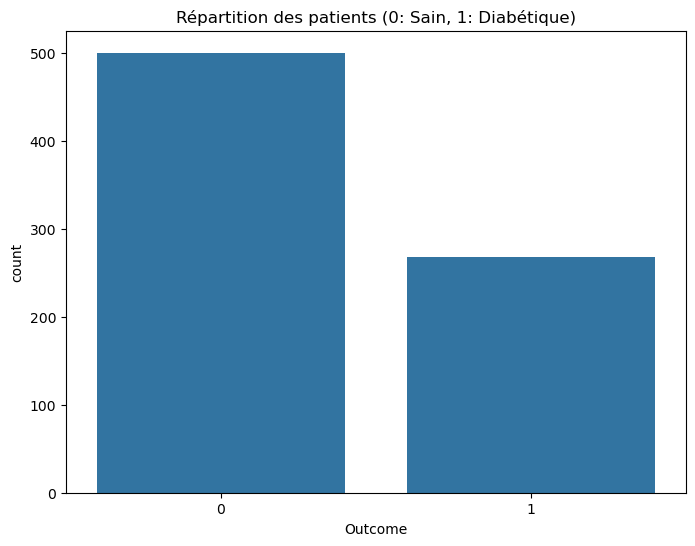

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]
Données d'entraînement: 460 patients
Données de validation: 154 patients
Données de test: 154 patients
Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64
Précision: 0.7792207792207793
Précision (vrais positifs): 0.6612903225806451
Rappel (couverture): 0.7592592592592593
Score F1: 0.7068965517241379


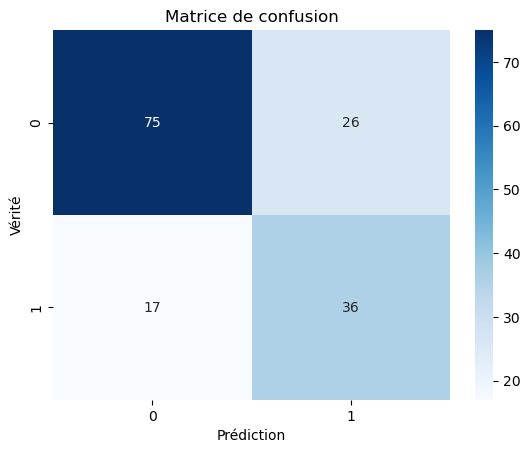

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       101
           1       0.58      0.68      0.63        53

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.73       154



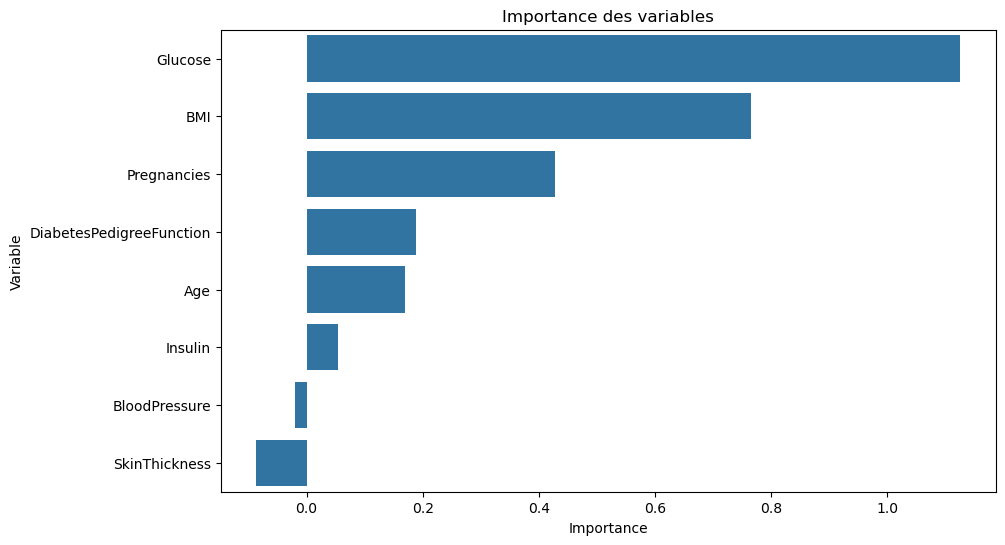

Exemples d'erreurs:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     -0.547919  1.161918       0.133453       0.670643  3.467383  1.010784   
3      0.342981  1.096168       0.960667       1.695058  4.683692  0.908902   
4      0.046014  0.044175      -0.859204      -0.012301 -0.181541 -0.066254   
10    -0.844885 -0.218823      -0.197433       0.101523 -0.517474  0.312165   
12    -0.250952  0.241424      -0.693761      -0.012301 -0.297380 -0.881309   

    DiabetesPedigreeFunction       Age  Vérité  Prédiction  
0                  -1.020427 -0.275760       0           1  
3                   0.444331  0.064591       0           1  
4                  -0.742576  0.149679       1           0  
10                  0.172520 -0.105584       1           0  
12                 -0.763716 -0.445935       1           0  
Performance finale:
Précision: 0.72
Précision (vrais positifs): 0.58
Rappel: 0.68
Score F1: 0.63

Suggestions d'amélioration:
1. Le modèle 

In [3]:
############################# 1. Import des données ################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# On charge le fichier CSV
donnees_diabete = pd.read_csv('diabetes.csv')

############################# 2. Nettoyage des données ################################################
# On vérifie d'abord s'il y a des valeurs manquantes
print("Valeurs manquantes avant nettoyage:\n")
print(donnees_diabete.isnull().sum())

# Colonnes où 0 n'est pas une valeur valide
colonnes_a_verifier = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# On remplace les 0 par NaN
donnees_diabete[colonnes_a_verifier] = donnees_diabete[colonnes_a_verifier].replace(0, np.nan)

# Calcul des médianes pour remplacer les NaN
valeurs_medianes = donnees_diabete[colonnes_a_verifier].median()

# Remplissage des valeurs manquantes
donnees_diabete[colonnes_a_verifier] = donnees_diabete[colonnes_a_verifier].fillna(valeurs_medianes)

# Vérification après nettoyage
print("\nValeurs manquantes après nettoyage:\n")
print(donnees_diabete.isnull().sum())

# Normalisation des données
normaliseur = StandardScaler()
X = donnees_diabete.drop('Outcome', axis=1)
y = donnees_diabete['Outcome']
X_normalise = normaliseur.fit_transform(X)

############################# 3. Analyse des données ################################################
# Répartition des classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=donnees_diabete)
plt.title('Répartition des patients (0: Sain, 1: Diabétique)')
plt.show()

# Statistiques descriptives
print(donnees_diabete.groupby('Outcome').describe().transpose())

############################# 4. Découpage des données ################################################
# Séparation initiale (60% train, 40% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X_normalise, y, test_size=0.4, random_state=42, stratify=y)

# Séparation du temp en validation et test (20% chacun)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Données d'entraînement: {X_train.shape[0]} patients")
print(f"Données de validation: {X_val.shape[0]} patients")
print(f"Données de test: {X_test.shape[0]} patients")

############################# 5. Feature engineering / sélection ################################################
# Nous avons déjà standardisé les données
# Pour la sélection de features, nous pourrions utiliser SelectKBest ou une analyse d'importance des features après modélisation


############################# 6. Gestion du déséquilibre ################################################
# On regarde la proportion de chaque classe
print(y_train.value_counts(normalize=True))

# On utilise class_weight pour équilibrer les classes

############################# 7. Premier modèle ################################################
# Création et entraînement du modèle
modele_logreg = LogisticRegression(class_weight='balanced', random_state=42)
modele_logreg.fit(X_train, y_train)

# Prédictions sur les données de validation
predictions_val = modele_logreg.predict(X_val)

# Performance
print("Précision:", accuracy_score(y_val, predictions_val))
print("Précision (vrais positifs):", precision_score(y_val, predictions_val))
print("Rappel (couverture):", recall_score(y_val, predictions_val))
print("Score F1:", f1_score(y_val, predictions_val))

############################# 8. Évaluation finale ################################################
# Prédictions sur le test
predictions_test = modele_logreg.predict(X_test)

# Matrice de confusion
mat_conf = confusion_matrix(y_test, predictions_test)
sns.heatmap(mat_conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion')
plt.show()

# Rapport complet
print(classification_report(y_test, predictions_test))

############################# 9. Interprétation ################################################
# Importance des variables
importance_variables = pd.DataFrame({
    'Variable': donnees_diabete.columns[:-1],
    'Importance': modele_logreg.coef_[0]
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=importance_variables)
plt.title('Importance des variables')
plt.show()

# Analyse des erreurs
X_test_df = pd.DataFrame(X_test, columns=donnees_diabete.columns[:-1])

# Réinitialisation des index
X_test_df = X_test_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
predictions_test = pd.Series(predictions_test).reset_index(drop=True)

# Création du tableau des erreurs
erreurs = X_test_df[y_test != predictions_test].copy()
erreurs['Vérité'] = y_test[y_test != predictions_test].values
erreurs['Prédiction'] = predictions_test[y_test != predictions_test].values

print("Exemples d'erreurs:")
print(erreurs.head())

############################# 10. Conclusion ################################################
print("Performance finale:")
print(f"Précision: {accuracy_score(y_test, predictions_test):.2f}")
print(f"Précision (vrais positifs): {precision_score(y_test, predictions_test):.2f}")
print(f"Rappel: {recall_score(y_test, predictions_test):.2f}")
print(f"Score F1: {f1_score(y_test, predictions_test):.2f}")


# Recommandations
print("\nSuggestions d'amélioration:")
print("1. Le modèle pourrait être amélioré pour mieux détecter les diabétiques")
print("2. Glucose et BMI sont les variables les plus importantes")
print("3. Pour aller plus loin:")
print("   - Tester d'autres algorithmes")
print("   - Ajuster les paramètres")
print("   - Obtenir plus de données")